Import all the Required Libraries

In [11]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential 
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from keras.models import load_model
import os
import cv2 


Create a Folders for train and test and split the main pictures of cats and dogs to train and test


In [17]:
import os
import random
import shutil

# Define the source directory and the destination directories
source_dir = 'C:\\Users\\Muhammad Ihtesham\\Desktop\\Windows sa pahela\\Gray scal Images\\Code In Python About The Reasearch paper\\Keras\\PetImages'
train_dir = 'C:\\Users\\Muhammad Ihtesham\\Desktop\\Windows sa pahela\\Gray scal Images\\Code In Python About The Reasearch paper\\Keras\\train'
test_dir = 'C:\\Users\\Muhammad Ihtesham\\Desktop\\Windows sa pahela\\Gray scal Images\\Code In Python About The Reasearch paper\\Keras\\test'

# Create the destination directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Iterate through the subdirectories (Cat and Dog) in the source directory
for class_name in ['Cat', 'Dog']:
    class_dir = os.path.join(source_dir, class_name)

    # Check if the class directory exists
    if not os.path.exists(class_dir):
        print(f"Directory not found: {class_dir}")
        continue

    # Get a list of all image files in the class directory
    image_files = os.listdir(class_dir)

    # Shuffle the image files randomly
    random.shuffle(image_files)

    # Calculate the split index for train and test (e.g., 80% train, 20% test)
    split_index = int(0.8 * len(image_files))

    # Copy images to the train and test directories
    for i, image_file in enumerate(image_files):
        source_path = os.path.join(class_dir, image_file)
        if i < split_index:
            destination_path = os.path.join(train_dir, class_name, image_file)
        else:
            destination_path = os.path.join(test_dir, class_name, image_file)

        # Create the destination directory if it doesn't exist
        os.makedirs(os.path.dirname(destination_path), exist_ok=True)

        # Copy the image file
        shutil.copy(source_path, destination_path)

print("Train and test data folders created successfully.")


Train and test data folders created successfully.


Normilized the data & remove the correpted inmages

In [18]:


# Define a preprocessing function to ensure correct number of channels and normalization
def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)
    return image, label

# Function to filter out corrupted images
def is_valid_image(file_path):
    try:
        img = tf.io.read_file(file_path)
        img = tf.image.decode_image(img, channels=3)
        return True
    except:
        return False

# Remove corrupted images
def clean_dataset(dataset_dir):
    for class_name in ['Cat', 'Dog']:
        class_dir = os.path.join(dataset_dir, class_name)
        image_files = os.listdir(class_dir)
        for image_file in image_files:
            file_path = os.path.join(class_dir, image_file)
            if not is_valid_image(file_path):
                os.remove(file_path)
                print(f"Removed corrupted image: {file_path}")

clean_dataset(train_dir)
clean_dataset(test_dir)

Removed corrupted image: C:\Users\Muhammad Ihtesham\Desktop\Windows sa pahela\Gray scal Images\Code In Python About The Reasearch paper\Keras\train\Cat\4351.jpg
Removed corrupted image: C:\Users\Muhammad Ihtesham\Desktop\Windows sa pahela\Gray scal Images\Code In Python About The Reasearch paper\Keras\train\Cat\Thumbs.db
Removed corrupted image: C:\Users\Muhammad Ihtesham\Desktop\Windows sa pahela\Gray scal Images\Code In Python About The Reasearch paper\Keras\train\Dog\11233.jpg
Removed corrupted image: C:\Users\Muhammad Ihtesham\Desktop\Windows sa pahela\Gray scal Images\Code In Python About The Reasearch paper\Keras\train\Dog\11912.jpg
Removed corrupted image: C:\Users\Muhammad Ihtesham\Desktop\Windows sa pahela\Gray scal Images\Code In Python About The Reasearch paper\Keras\train\Dog\2494.jpg
Removed corrupted image: C:\Users\Muhammad Ihtesham\Desktop\Windows sa pahela\Gray scal Images\Code In Python About The Reasearch paper\Keras\train\Dog\9500.jpg
Removed corrupted image: C:\Use

Make CNN Model and Pass the data 
and Make 3 convolution layers 
1 layer 32 fliters
2 layer 64 fliters
3 layer 128 fliters

Load the data set Train data set and Test data set 

In [19]:
# Load the datasets
train_data_set = keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
)

test_data_set = keras.utils.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
)

train_data_set = train_data_set.map(process)
test_data_set = test_data_set.map(process)

Found 19945 files belonging to 2 classes.
Found 4987 files belonging to 2 classes.


Make CNN Model
3 convolution layers 
1 layer 32 fliters
2 layer 64 fliters
3 layer 128 fliters

In [22]:
from keras.layers import BatchNormalization, Dropout
# Define the model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2), padding='valid', strides=2),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2), padding='valid', strides=2),
    Dropout(0.25),

    Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2), padding='valid', strides=2),
    Dropout(0.25),

    Flatten(),
    Dense(265, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

Model Summary

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 265)            │    30,528,265 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 265)            │         1,060 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 265)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,640,558 (116.88 MB)

 Trainable params: 30,639,580 (116.88 MB)

 Non-trainable params: 978 (3.82 KB)

Compile The Model

In [24]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Fit The Model

In [25]:

# Train the model
history = model.fit(train_data_set, epochs=10, validation_data=test_data_set)
print("Model training complete.")

Epoch 1/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 4701s 8s/step - accuracy: 0.6194 - loss: 0.7009 - val_accuracy: 0.6776 - val_loss: 0.6182
Epoch 2/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 1800s 3s/step - accuracy: 0.7280 - loss: 0.5407 - val_accuracy: 0.7668 - val_loss: 0.4873
Epoch 3/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 2492s 4s/step - accuracy: 0.7838 - loss: 0.4540 - val_accuracy: 0.7901 - val_loss: 0.4464
Epoch 4/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 1426s 2s/step - accuracy: 0.8294 - loss: 0.3681 - val_accuracy: 0.8037 - val_loss: 0.4296
Epoch 5/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 1421s 2s/step - accuracy: 0.8732 - loss: 0.2975 - val_accuracy: 0.8111 - val_loss: 0.4364
Epoch 6/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 1433s 2s/step - accuracy: 0.8509 - loss: 0.3388 - val_accuracy: 0.8404 - val_loss: 0.3967
Epoch 7/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 1565s 2s/step - accuracy: 0.9163 - loss: 0.2042 - val_accuracy: 0.8382 - val_loss: 0.4199
Epoch 8/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 1794s 3s/step - accuracy: 0.9307 - loss: 0.1709 - 

Evaluate the Model

In [26]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_data_set)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

156/156 ━━━━━━━━━━━━━━━━━━━━ 64s 410ms/step - accuracy: 0.8337 - loss: 0.5392
Test Loss: 0.49939408898353577
Test Accuracy: 0.8369761109352112


Save The Model

In [27]:
save_path = 'C:\\Users\Muhammad Ihtesham\\Desktop\\Windows sa pahela\\Gray scal Images\\Code In Python About The Reasearch paper\\Keras\\model.h5'
model.save(save_path)

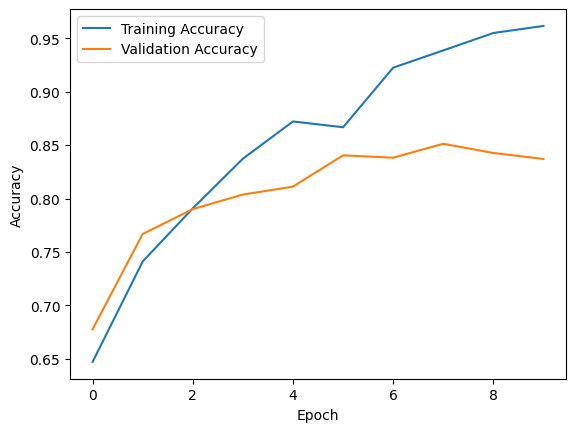

In [28]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

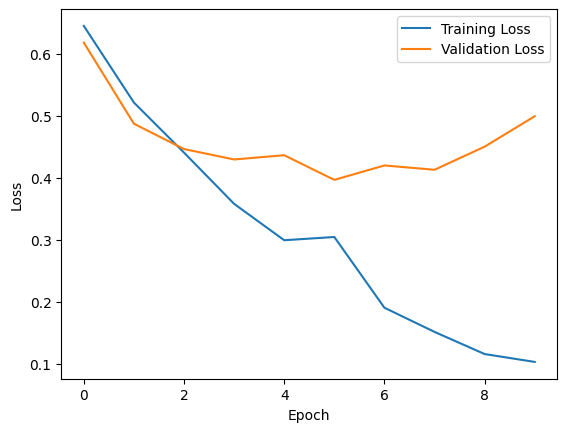

In [29]:
#training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

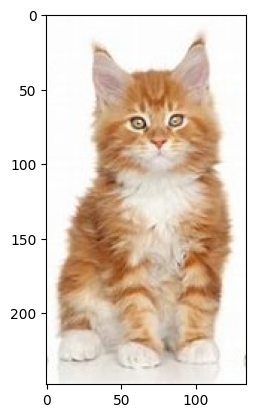

In [31]:
#check new image category
import cv2
import matplotlib.pyplot as plt
test_image = cv2.imread('cat.jpeg')
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.show()

In [32]:
test_image.shape
resiz_image = cv2.resize(test_image, (256, 256))
test_input=resiz_image.reshape(1,256,256,3)
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


array([[0.]], dtype=float32)

In [ ]:
save_path = 'C:\\Users\Muhammad Ihtesham\\Desktop\\Windows sa pahela\\Gray scal Images\\Code In Python About The Reasearch paper\\Keras\\model.h5'
model.save(save_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Predicted class: Cat, Prediction score: [0.10968842]


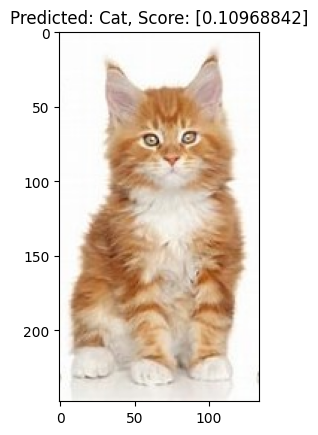

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the trained model
model = keras.models.load_model('model.h5')

# Function to preprocess the image
def preprocess_image(image_path, img_size=(256, 256)):
    # Read the image
    img = cv2.imread(image_path)
    # Resize the image
    img = cv2.resize(img, img_size)
    # Normalize the image
    img = img / 255.0
    # Expand dimensions to match the expected input shape
    img = np.expand_dims(img, axis=0)
    return img

# Function to make a prediction
def predict_image(image_path):
    # Preprocess the image
    img = preprocess_image(image_path)
    # Make a prediction
    prediction = model.predict(img)
    # Get the predicted class
    predicted_class = 'Dog' if prediction[0] > 0.5 else 'Cat'
    return predicted_class, prediction[0]

# Path to a single image
image_path = 'cat.jpeg'

# Make a prediction
predicted_class, prediction_score = predict_image(image_path)

print(f"Predicted class: {predicted_class}, Prediction score: {prediction_score}")


# Display the image
img = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(f"Predicted: {predicted_class}, Score: {prediction_score}")
plt.show()
